# 1.Load the Dataset and Explore Basic Information

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

file_path = "global_power_plant_database.csv"   # load from local file
df = pd.read_csv(file_path) 
print(df.head(5))
print(df.isnull().sum())

print("\nDataset Info:")
print(df.info())

# After check all columns, I check how many countries and fuel types are in the dataset
print(f"Total number of country:  {df['country_long'].nunique()}")
print(f"Total kind of fuel: {df['primary_fuel'].nunique()}")

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

/var/folders/qn/n2d92jbs531261lpl2zdf0840000gn/T/ipykernel_39558/2411200456.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# From the dataset info, I found that the electricity generation and estimation columns have a lot of missing values.
# I was supposed to do some analysis on Finland, but I found the in all European countries, maybe due to the data sensitivity, almost of the generation data are missing. 
# But I still want to make some analysis on Europe, and since I can't change the dataset anymore, I will prefrom time-base analysis on U.S.A.

# List of countries in Europe mannually
europe_countries = [
    'Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'
]

# Check if all European countries are in the dataset
dataset_countries = df['country_long'].unique().tolist()
missing_countries = [country for country in europe_countries if country not in dataset_countries]
if missing_countries:
    print(f"Missing European countries in the dataset: {missing_countries}")
else:
    print("All European countries are present in the dataset.")   

All European countries are present in the dataset.


In [48]:
# Select only European growth plants
europe_df = df[df['country_long'].isin(europe_countries)]

# generation_gwh_2013, generation_gwh_2014..
year_cols = [col for col in df.columns if col.startswith('generation_gwh_')]

# calculate the missing values ratio of reported generation for year 2013-2019 in the dataset
missing_ratio = europe_df[year_cols].isna().mean()
print(missing_ratio * 100)  # as percentage

# calculate the missing values ratio of estimated generation for year 2013-2017 in the dataset
estimate_year_cols = [col for col in df.columns if col.startswith('estimated_generation_gwh_')]
estimate_missing_ratio = europe_df[estimate_year_cols].isna().mean()
print(f"\n{estimate_missing_ratio * 100}")  # as percentage

generation_gwh_2013    100.000000
generation_gwh_2014    100.000000
generation_gwh_2015     95.262636
generation_gwh_2016     95.143707
generation_gwh_2017     95.480674
generation_gwh_2018     99.990089
generation_gwh_2019    100.000000
dtype: float64

estimated_generation_gwh_2013    38.245788
estimated_generation_gwh_2014    37.968285
estimated_generation_gwh_2015    37.383548
estimated_generation_gwh_2016    37.086224
estimated_generation_gwh_2017     5.668979
dtype: float64


### Europe has too much missing time series data for time series analysis.
### Only use Finland Installed Capacity for descriptive analysis.

# 2.Perform a Descriptive Summary

Standard deviation: 162.52
Median capacity: 19.10
Average capacity: 63.77
Largest power plant in Finland: 1760.0 at Olkiluoto 1
Smallest power plant in Finland: 1.0 at Jalasjoki/Niiles


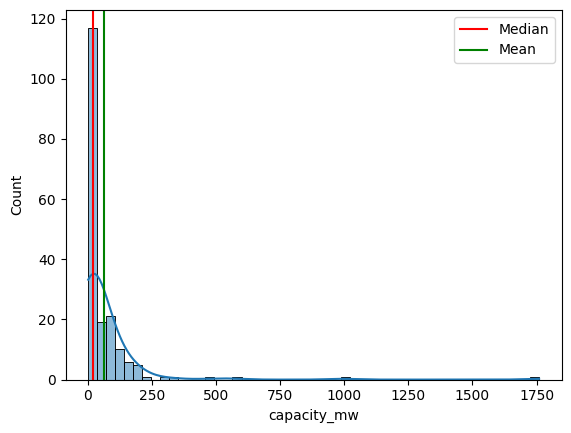

In [ ]:
finland_df = df[df['country_long'] == 'Finland']

std_finland = finland_df['capacity_mw'].std()
median_finland = finland_df['capacity_mw'].median()
avg_finland = finland_df['capacity_mw'].mean()

print(f"Standard deviation: {std_finland:.2f}")
print(f"Median capacity: {median_finland:.2f}")
print(f"Average capacity: {avg_finland:.2f}")

# outliers
max_finland = finland_df['capacity_mw'].max()
largest_plants = finland_df[finland_df['capacity_mw'] == max_finland]

min_finland = finland_df['capacity_mw'].min()
smallest_plants = finland_df[finland_df['capacity_mw'] == min_finland]

print(f"Largest power plant in Finland: {max_finland} at {largest_plants['name'].values[0]}")
print(f"Smallest power plant in Finland: {min_finland} at {smallest_plants['name'].values[0]}")

# Plotting the distribution of capacity_mw in Finland
sns.histplot(finland_df['capacity_mw'], bins=50, kde=True)
plt.axvline(median_finland, color='red', label='Median')
plt.axvline(avg_finland, color='green', label='Mean')
plt.legend()


Finland :
primary_fuel
Nuclear    2752.00
Hydro      2382.32
Biomass    2180.44
Gas        1924.10
Coal       1340.00
Oil         858.80
Other       282.50
Wind         76.60
Name: capacity_mw, dtype: float64

Sweden :
primary_fuel
Hydro      12822.9
Nuclear     9762.0
Gas         1340.0
Biomass      876.7
Oil          840.0
Wind         697.1
Coal          80.0
Name: capacity_mw, dtype: float64

Norway :
primary_fuel
Hydro    30474.0
Gas       1454.0
Wind       623.0
Name: capacity_mw, dtype: float64

Denmark :
primary_fuel
Coal          5089.0
Wind          1408.1
Oil            664.0
Gas            571.0
Solar          251.1
Biomass         88.0
Geothermal      14.0
Name: capacity_mw, dtype: float64


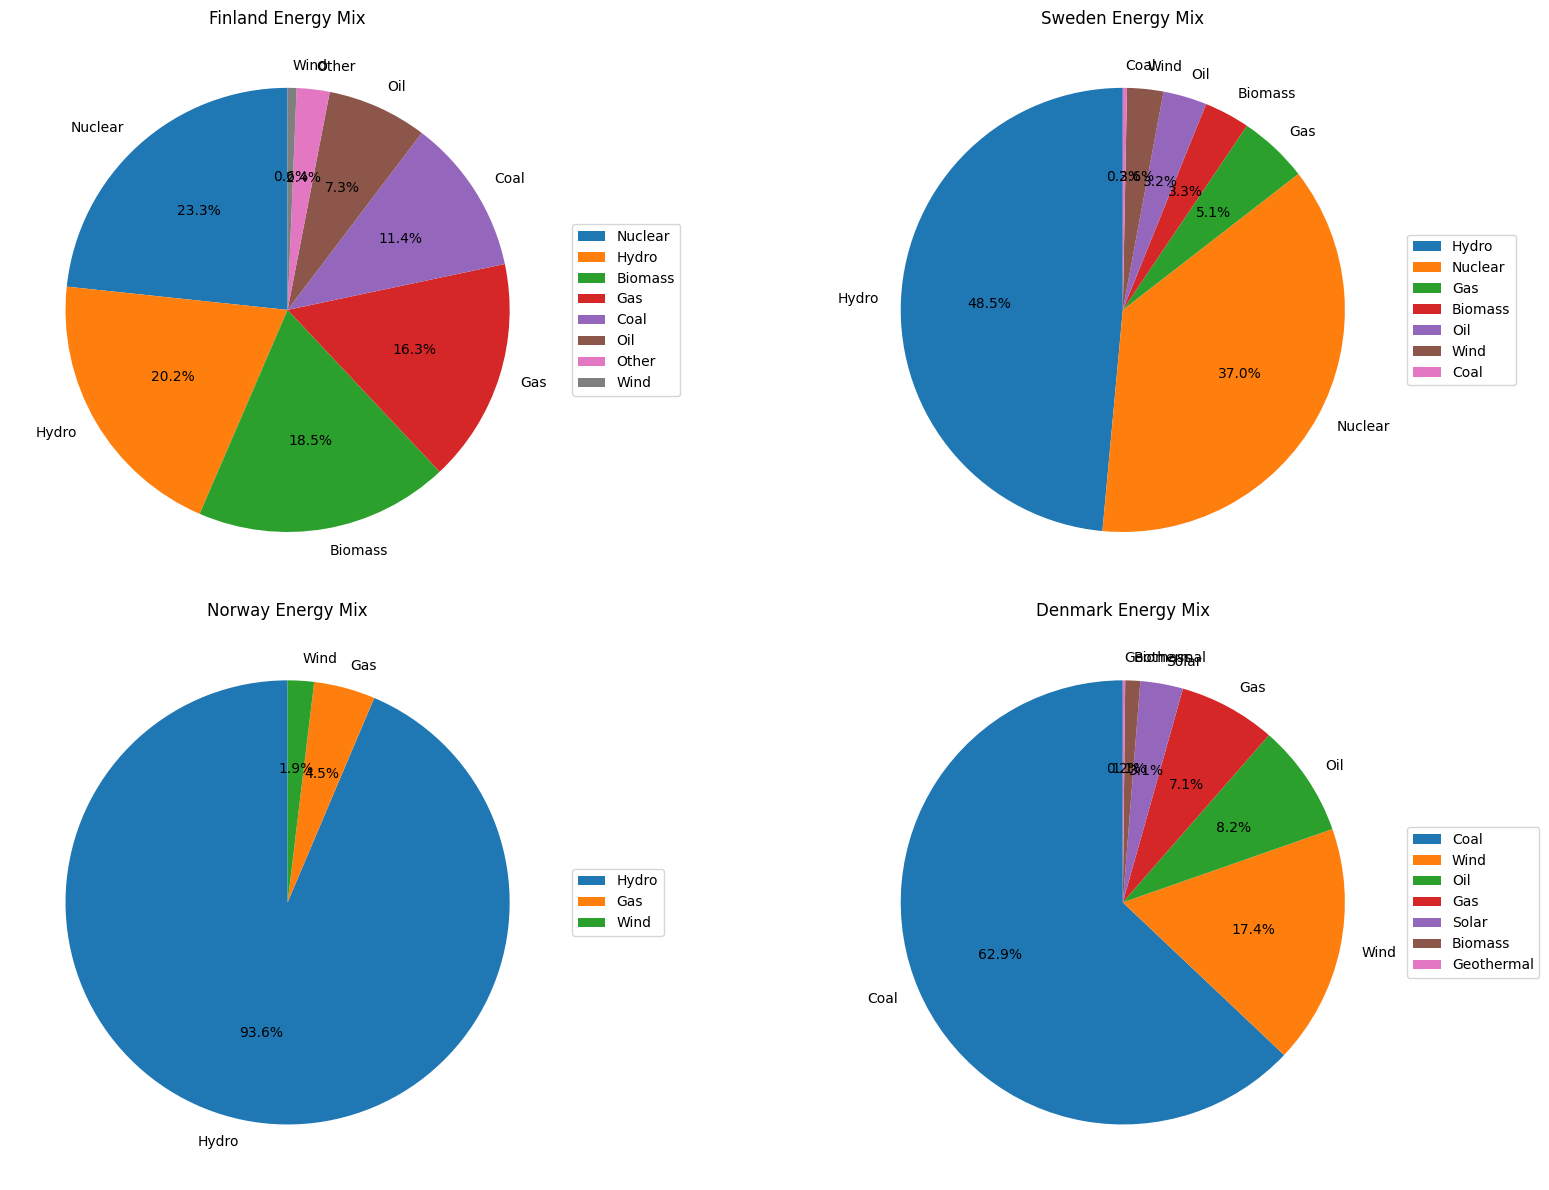

In [ ]:
# Define list of European countries
europe = ['Finland', 'Sweden', 'Norway', 'Denmark']

# Filter data for selected European countries
europe_df = df[df['country_long'].isin(europe)]

country_fuels = {}
for country in europe:
    country_df = europe_df[europe_df['country_long'] == country]
    if not country_df.empty:
        country_fuels[country] = country_df.groupby('primary_fuel')['capacity_mw'].sum().sort_values(ascending=False)

for country, fuel_data in country_fuels.items():
    print(f"\n{country} :")
    print(fuel_data)


fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, (country, fuel_data) in enumerate(country_fuels.items()):
    fuel_data.plot(
        kind='pie',
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        title=f'{country} Energy Mix'
    )
    axes[i].set_ylabel('') 
    axes[i].legend(bbox_to_anchor=(1, 0.5), loc='center left') 


plt.tight_layout()
plt.show()

# 3.Perform a Time-Based Analysis

In [41]:
#filter data for USA
us_df = df[df['country'] == 'USA']
#print(us_df.info())


# check if U.S.A has how many missing values for both genearation and estimation 
year_cols = []
estimate_year_cols = []

for col in df.columns:
    if col.startswith('generation_gwh_'):
        year_cols.append(col)
    if col.startswith('estimated_generation_gwh_'):
        estimate_year_cols.append(col)

# calculate the missing values ratio of reported generation for year 2013-2019 in the dataset
missing_count = 0
total_cells = len(us_df) * len(year_cols) 

for col in year_cols:
    missing_count += us_df[col].isna().sum()  # check in U.S.A how many missing values for each year

missing_ratio = (missing_count / total_cells) * 100
print(f"Generation missing value: {missing_ratio:.2f}%")

# calculate the missing values ratio of estimated generation for year 2013-2017 in the dataset
estimate_missing_count = 0
estimate_total_cells = len(us_df) * len(estimate_year_cols)

for col in estimate_year_cols:
    estimate_missing_count += us_df[col].isna().sum()

estimate_missing_ratio = (estimate_missing_count / estimate_total_cells) * 100
print(f"\nEstimation missing value: {estimate_missing_ratio:.2f}%")

Generation missing value: 20.90%

Estimation missing value: 55.52%


### Reported Generation Value has less missing data, so I use generation value to do time-base analysis.

Average Generation Value for U.S.A. Growth Plants:
generation_gwh_2013    574.70
generation_gwh_2014    569.38
generation_gwh_2015    580.34
generation_gwh_2016    558.92
generation_gwh_2017    549.53
generation_gwh_2018    553.12
generation_gwh_2019    608.50
dtype: float64


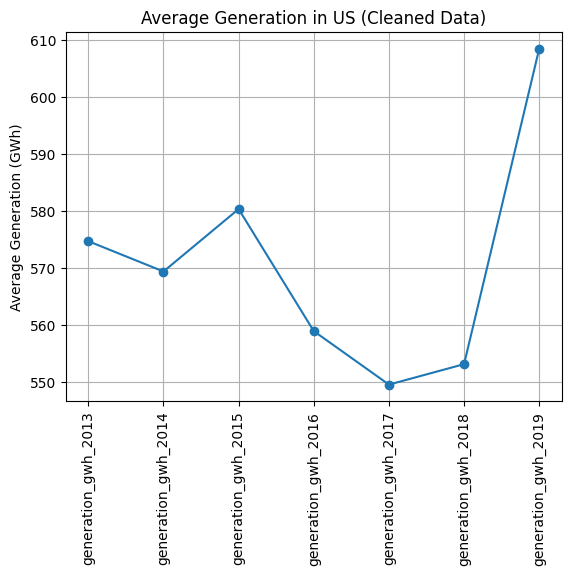

In [45]:
# deal with missing values
# gen_years = [f'generation_gwh_{y}' for y in range(2013, 2020)]
# us_clean = us_df[gen_years].dropna()
# avg_us = us_clean.mean()

# make a list to store each year
gen_years = []
for y in range(2013, 2020):
    gen_years.append(f'generation_gwh_{y}')

us_clean = us_df.copy() 
for col in us_df.columns:
    if col not in gen_years:
        us_clean = us_clean.drop(col, axis=1)  

us_clean = us_clean.dropna()  

# calculate the average generation for each year
avg_us = pd.Series(dtype='float64')  
for year_col in gen_years:
    if year_col in us_clean.columns: 
        avg_us[year_col] = us_clean[year_col].mean()
    else:
        avg_us[year_col] = None  
avg_us = avg_us.round(2)  # round to 2 decimal places 

print("Average Generation Value for U.S.A. Growth Plants:")
print(avg_us)


plt.plot(gen_years, avg_us, marker='o')
plt.title('Average Generation in US (Cleaned Data)')
plt.ylabel('Average Generation (GWh)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

                     capacity_mw  generation_gwh_2019
capacity_mw              1.00000              0.85444
generation_gwh_2019      0.85444              1.00000


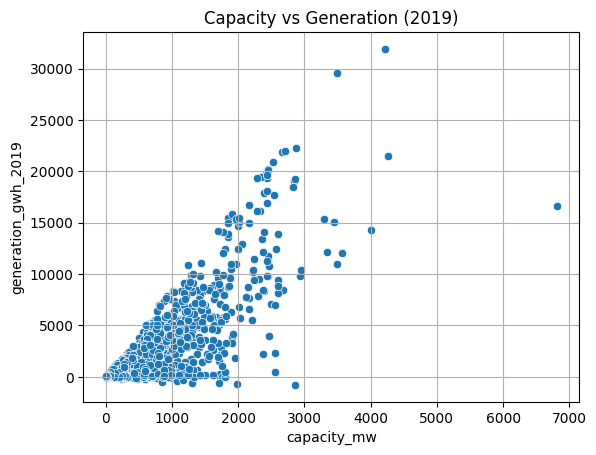

In [ ]:
# Choose the year 2019 for correlation analysis(since 2019 miss less values)
corr_df = us_df[['capacity_mw', 'generation_gwh_2019']].dropna()

# calculate the correlation
correlation = corr_df.corr()
print(correlation)

import seaborn as sns
sns.scatterplot(data=corr_df, x='capacity_mw', y='generation_gwh_2019')
plt.title('Capacity vs Generation (2019)')
plt.grid(True)
plt.show()

primary_fuel
Nuclear         7.736392
Waste           4.879844
Biomass         4.433952
Geothermal      4.105013
Cogeneration    4.095112
Hydro           3.578806
Coal            3.525250
Other           3.073385
Petcoke         2.728145
Gas             2.615158
Wind            2.598291
Solar           1.584889
Oil             0.250171
Storage        -0.048745
Name: efficiency_2019, dtype: float64


/var/folders/qn/n2d92jbs531261lpl2zdf0840000gn/T/ipykernel_39558/4134879542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['efficiency_2019'] = us_df['generation_gwh_2019'].dropna() / us_df['capacity_mw'].dropna()


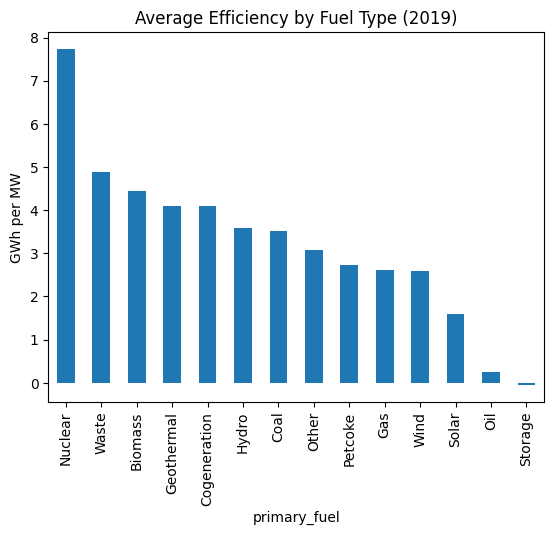

In [47]:
us_df['efficiency_2019'] = us_df['generation_gwh_2019'].dropna() / us_df['capacity_mw'].dropna()
efficiency = us_df.groupby('primary_fuel')['efficiency_2019'].mean().sort_values(ascending=False)
print(efficiency)

efficiency.plot(kind='bar', title='Average Efficiency by Fuel Type (2019)')
plt.ylabel('GWh per MW')
plt.show()

# 4.Predictive Analysis

R² Score: 0.7683459405955708
Mean Squared Error: 467344.0805458575


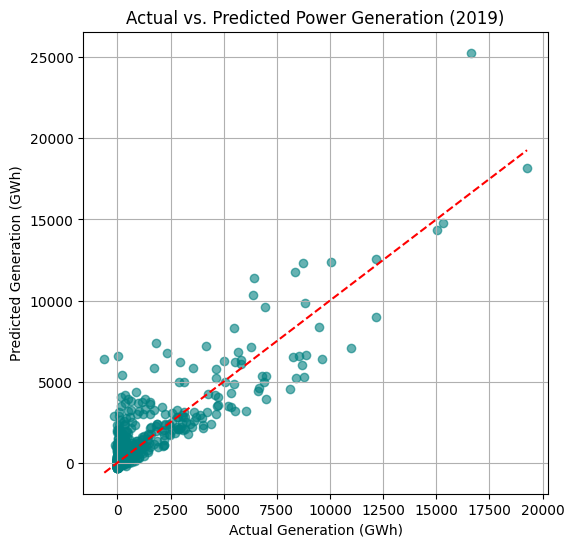

In [ ]:
predict_df = us_df[['capacity_mw', 'primary_fuel', 'commissioning_year', 'generation_gwh_2019']].dropna()
# convert categorical variable to dummy variables
predict_df = pd.get_dummies(predict_df, columns=['primary_fuel'], drop_first=True) 

X = predict_df.drop('generation_gwh_2019', axis=1)
y = predict_df['generation_gwh_2019']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Generation (GWh)')
plt.ylabel('Predicted Generation (GWh)')
plt.title('Actual vs. Predicted Power Generation (2019)')
plt.grid(True)
plt.show()